In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df_1 = pd.read_csv("steam-200k.csv",names = ['user','game','status','hour','4' ])

In [49]:
df_2 = pd.read_csv("steam_games.csv")

In [73]:
df_1

,user,game,status,hour,4
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [74]:
user_test = df_1[df_1['user'] == 241230534]
user_test

,user,game,status,hour,4
18354,241230534,Grand Theft Auto San Andreas,purchase,1.0,0
18355,241230534,Grand Theft Auto San Andreas,play,6.4,0
18356,241230534,Amnesia The Dark Descent,purchase,1.0,0
18357,241230534,Amnesia The Dark Descent,play,1.3,0
18358,241230534,Super Meat Boy,purchase,1.0,0
18359,241230534,Super Meat Boy,play,0.6,0
18360,241230534,Five Nights at Freddy's,purchase,1.0,0
18361,241230534,Five Nights at Freddy's,play,0.6,0
18362,241230534,Grand Theft Auto San Andreas,purchase,1.0,0


In [76]:
user_test[user_test['game'] == 'Grand Theft Auto San Andreas']

,user,game,status,hour,4
18354,241230534,Grand Theft Auto San Andreas,purchase,1.0,0
18355,241230534,Grand Theft Auto San Andreas,play,6.4,0
18362,241230534,Grand Theft Auto San Andreas,purchase,1.0,0


In [77]:
df_1['status'].value_counts()
df_1['purchase'] = 0
df_1['play'] = 0
df_1

,user,game,status,hour,4,purchase,play
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0,0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0,0,0
2,151603712,Fallout 4,purchase,1.0,0,0,0
3,151603712,Fallout 4,play,87.0,0,0,0
4,151603712,Spore,purchase,1.0,0,0,0
...,...,...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0,0,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0,0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0,0,0
199998,128470551,RUSH,purchase,1.0,0,0,0


In [78]:
for i in range(len(df_1)):
    if df_1['status'][i] == 'purchase':
        purchase_number = df_1['hour'][i]
        df_1['purchase'][i] = purchase_number

<ipython-input-78-73f070528f30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['purchase'][i] = purchase_number


In [79]:
df_1

,user,game,status,hour,4,purchase,play
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0,1,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0,0,0
2,151603712,Fallout 4,purchase,1.0,0,1,0
3,151603712,Fallout 4,play,87.0,0,0,0
4,151603712,Spore,purchase,1.0,0,1,0
...,...,...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0,0,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0,1,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0,0,0
199998,128470551,RUSH,purchase,1.0,0,1,0


In [80]:
for i in range(len(df_1)):    
    if df_1['status'][i] == 'play':
        play_hour = df_1['hour'][i]
        df_1['play'][i] = play_hour

<ipython-input-80-f4492ed12516>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['play'][i] = play_hour


In [81]:
df_1 = df_1.drop(columns=['hour','status','4'])

In [82]:
df_1

,user,game,purchase,play
0,151603712,The Elder Scrolls V Skyrim,1,0
1,151603712,The Elder Scrolls V Skyrim,0,273
2,151603712,Fallout 4,1,0
3,151603712,Fallout 4,0,87
4,151603712,Spore,1,0
...,...,...,...,...
199995,128470551,Titan Souls,0,1
199996,128470551,Grand Theft Auto Vice City,1,0
199997,128470551,Grand Theft Auto Vice City,0,1
199998,128470551,RUSH,1,0


In [83]:
df_1_group_user_and_game = df_1.groupby(by=['user', 'game'], ).sum()
df_1_group_user_and_game

purchase  play
user      game                                        
5250      Alien Swarm                          1     4
          Cities Skylines                      1   144
          Counter-Strike                       1     0
          Counter-Strike Source                1     0
          Day of Defeat                        1     0
...                                          ...   ...
309626088 Age of Empires II HD Edition         1     6
309812026 Counter-Strike Nexon Zombies         1     0
          Robocraft                            1     0
309824202 Dota 2                               1     0
309903146 Dota 2                               1     0

[128804 rows x 2 columns]

In [85]:
df_1_ungroup['purchase'].value_counts()

1    128097
2       707
Name: purchase, dtype: int64

In [86]:
df_1_ungroup[df_1_ungroup['purchase'] == 2]

,user,game,purchase,play
641,561758,Sid Meier's Civilization IV,2,0
642,561758,Sid Meier's Civilization IV Beyond the Sword,2,0
643,561758,Sid Meier's Civilization IV Colonization,2,0
644,561758,Sid Meier's Civilization IV Warlords,2,0
1547,1936551,Sid Meier's Civilization IV Colonization,2,7
...,...,...,...,...
121665,241230534,Grand Theft Auto San Andreas,2,6
122216,243664576,Grand Theft Auto San Andreas,2,0
125431,267053376,Grand Theft Auto San Andreas,2,49
128274,302237901,Grand Theft Auto San Andreas,2,0


In [87]:
df_1_ungroup

,user,game,purchase,play
0,5250,Alien Swarm,1,4
1,5250,Cities Skylines,1,144
2,5250,Counter-Strike,1,0
3,5250,Counter-Strike Source,1,0
4,5250,Day of Defeat,1,0
...,...,...,...,...
128799,309626088,Age of Empires II HD Edition,1,6
128800,309812026,Counter-Strike Nexon Zombies,1,0
128801,309812026,Robocraft,1,0
128802,309824202,Dota 2,1,0


In [94]:
df_1_ungroup['user'].nunique()

12393

In [95]:
df_1_ungroup['game'].nunique()

5155

In [88]:
user_test = df_1[df_1['user'] == 241230534]
user_test

,user,game,purchase,play
18354,241230534,Grand Theft Auto San Andreas,1,0
18355,241230534,Grand Theft Auto San Andreas,0,6
18356,241230534,Amnesia The Dark Descent,1,0
18357,241230534,Amnesia The Dark Descent,0,1
18358,241230534,Super Meat Boy,1,0
18359,241230534,Super Meat Boy,0,0
18360,241230534,Five Nights at Freddy's,1,0
18361,241230534,Five Nights at Freddy's,0,0
18362,241230534,Grand Theft Auto San Andreas,1,0


In [89]:
user_test[user_test['game'] == 'Grand Theft Auto San Andreas']

,user,game,purchase,play
18354,241230534,Grand Theft Auto San Andreas,1,0
18355,241230534,Grand Theft Auto San Andreas,0,6
18362,241230534,Grand Theft Auto San Andreas,1,0


In [ ]:
purchase_filter = pd.DataFrame(df_1[df_1['purchase']=='purchase'])

In [ ]:
pd.DataFrame(purchase_filter['1.0']).value_counts()

In [ ]:
play_filter = pd.DataFrame(df_1[df_1['purchase']=='play'])

pd.DataFrame(play_filter['1.0']).value_counts()

In [ ]:
import seaborn as sns


In [ ]:
play_filter['1.0'].sort_values()

In [ ]:
sns.barplot(play_filter['1.0'])

In [96]:
df_2

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

In [ ]:
df_2[df_2['name'] == 'Grand Theft Auto V']

In [ ]:
9/35

In [ ]:
df_2['types'].value_counts()

In [ ]:
df_2[df_2['types']=='bundle']

In [ ]:
df_2['genre'][1]

In [ ]:
df_2['genre'][1].replace(',', ' ')

In [ ]:
(df_2['genre'][1].replace(',', ' ')).split()

In [ ]:
df = pd.read_csv("steam-200k.csv",names = ['user','game','purchase','hour','4' ])
df.groupby(['user','game']).max() # la colonne hour va prendre le nombre d'heure normalement et seulement 1 si le jeux a été acheté sans être joué
# on voit bien que l'utilisateur a acheté sans joué
df[(df['game']=='Counter-Strike Nexon Zombies')&(df['user']==309812026)]
# l'utilisateur a tres peu joué
df[(df['game']=='Dota 2')&(df['user']==309824202)]
#nombre total d'heure joué par jeux, et acheté/joué
df.groupby(['purchase','game']).sum().sort_values(by='hour')
#on trouve ce genre de jeux presque pas joué
df[df['game']=='Mr. Robot']

In [97]:
df_1_ungroup

,user,game,purchase,play
0,5250,Alien Swarm,1,4
1,5250,Cities Skylines,1,144
2,5250,Counter-Strike,1,0
3,5250,Counter-Strike Source,1,0
4,5250,Day of Defeat,1,0
...,...,...,...,...
128799,309626088,Age of Empires II HD Edition,1,6
128800,309812026,Counter-Strike Nexon Zombies,1,0
128801,309812026,Robocraft,1,0
128802,309824202,Dota 2,1,0


In [98]:
from sklearn.decomposition import TruncatedSVD

In [99]:
hours_df = df_1_ungroup.pivot(index = 'user', columns ='game', values = 'play').fillna(0)

In [100]:
hours_df

game,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,samurai_jazz,the static speaks my name,theHunter,theHunter Primal
user,,,,,,,,,,,,,,,,,,,,,
5250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309554670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309626088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309812026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
svd = TruncatedSVD(n_components=200)

In [110]:
latent_df = svd.fit_transform(hours_df)

In [111]:
latent_df

array([[ 4.33046025e-02,  1.66634379e-01,  1.19644326e-01, ...,
        -1.67705052e+01, -4.12000241e+00,  2.34913425e+00],
       [ 6.76677760e+00,  1.33814046e+02, -1.92148272e+01, ...,
         3.34859858e+00,  3.19735960e+00, -2.11698267e+00],
       [ 5.47837783e-01,  2.21428098e+00,  8.93268234e-01, ...,
         1.42443540e+00,  5.35100031e-01,  5.29962257e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

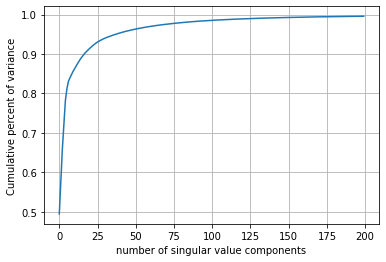

In [112]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [113]:
latent_df

array([[ 4.33046025e-02,  1.66634379e-01,  1.19644326e-01, ...,
        -1.67705052e+01, -4.12000241e+00,  2.34913425e+00],
       [ 6.76677760e+00,  1.33814046e+02, -1.92148272e+01, ...,
         3.34859858e+00,  3.19735960e+00, -2.11698267e+00],
       [ 5.47837783e-01,  2.21428098e+00,  8.93268234e-01, ...,
         1.42443540e+00,  5.35100031e-01,  5.29962257e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
hours_df

game,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,samurai_jazz,the static speaks my name,theHunter,theHunter Primal
user,,,,,,,,,,,,,,,,,,,,,
5250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309554670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309626088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309812026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
hours_scaled = pd.DataFrame(hours_scaled)

In [137]:
hours_scaled.columns.values.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [143]:
for column in hours_df.columns.values.tolist():
    scaler = MinMaxScaler()
    scaler.fit_transform(hours_df[column])

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [120]:
hours_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
latent_scaled_df = svd.fit_transform(hours_scaled)

In [123]:
latent_scaled_df

array([[ 0.00637719, -0.0016293 ,  0.0466473 , ...,  0.01677461,
        -0.02334898,  0.01244045],
       [ 0.00309982, -0.00042702,  0.03232547, ...,  0.02783139,
        -0.02869582,  0.04814966],
       [ 0.01386747,  0.01769197,  0.04791635, ..., -0.00742908,
        -0.03373323, -0.01823296],
       ...,
       [ 0.        , -0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ]])

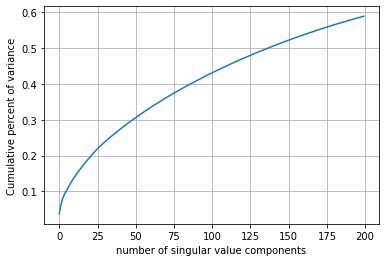

In [124]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()